In [16]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cleaning and Preprocessing Data for Machine Learning

In [17]:
Strain_Frame = pd.read_csv('../Resources/Strain_Frame.csv')
print("Strain_Frame:",Strain_Frame.shape)
Strain_Frame.head()

Strain_Frame: (2351, 186)


,Strain,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
0,100 Og,4.0,3,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,98 White Widow,4.7,3,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1024,4.4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13 Dawgs,4.2,3,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
4,24K Gold,4.6,3,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Split data and labels and reshape

In [18]:
X = Strain_Frame[["Rating", "StrainType", "Type: Hybrid", "Type: Indica", "Type: Sativa", "Effect: Creative", "Effect: Energetic", "Effect: Tingly", "Effect: Euphoric", "Effect: Relaxed", "Effect: Aroused", "Effect: Happy", "Effect: Uplifted", "Effect: Hungry", "Effect: Talkative", "Effect: Sleepy","Effect: Focused", "Terpenes: Earthy", "Terpenes: Sweet", "Terpenes: Citrus", "Terpenes: Flowery", "Terpenes: Violet", "Terpenes: Diesel", "Terpenes: Spicy/Herbal", "Terpenes: Sage", "Terpenes: Woody", "Terpenes: Apricot", "Terpenes: Grapefruit", "Terpenes: Orange",  "Terpenes: None", "Terpenes: Pungent", 
"Terpenes: Grape", "Terpenes: Pine", "Terpenes: Skunk", "Terpenes: Berry", "Terpenes: Pepper", "Terpenes: Menthol", "Terpenes: Blue", "Terpenes: Cheese", "Terpenes: Chemical", "Terpenes: Mango", "Terpenes: Lemon", "Terpenes: Peach", "Terpenes: Vanilla", "Terpenes: Nutty", "Terpenes: Chestnut", "Terpenes: Tea", "Terpenes: Tobacco", "Terpenes: Tropical", "Terpenes: Strawberry", "Terpenes: Blueberry", "Terpenes: Mint", "Terpenes: Apple", "Terpenes: Honey", "Terpenes: Lavender", "Terpenes: Lime", "Terpenes: Unknown", "Terpenes: Coffee", "Terpenes: Ammonia", "Terpenes: Minty", "Terpenes: Tree", "Terpenes: Fruit", "Terpenes: Butter", "Terpenes: Pineapple", "Terpenes: Tar", "Terpenes: Rose", "Terpenes: Plum", "Terpenes: Pear", "Medical: Pain", "Medical: Insomnia", "Medical: Nausea", "Medical: Seizure", "Medical: Anxiety", "Medical: Muscle Spasms", "Medical: Appetite", "Medical: Stress", "Medical: Depression", "Medical: Crohn's Disease", "Medical: Substance Abuse", "Medical: PTSD", "Medical: Arthritis", "Medical: Fatigue", 
"Medical: ", "Parent: Aceh", "Parent: Hindu Kush",
"Parent: OG Kush", "Parent: Sour Diesel", "Parent: Granddaddy Purple", "Parent: Northern Lights", "Parent: Durban Poison", "Parent: Bubba Kush", "Parent: Pre-98 Bubba Kush", "Parent: Jack Herer", "Parent: Blue Dream", "Parent: Trainwreck", "Parent: Hawaiian", "Parent: Amnesia", "Parent: Super Silver Haze", "Parent: OG Badazz", "Parent: Ms. Universe", "Parent: LSD", "Parent: Banana OG", "Parent: White Widow", "Parent: Nepali OG", "Parent: Afgoo", "Parent: Appalachia", "Parent: Harlequin","Parent: Jack the Ripper", "Parent: Pennywise", "Parent: Lilly", "Parent: Headband", "Parent: Snowdawg", "Parent: Snow Lotus", "Parent: Green Crack", "Parent: Alien OG", "Parent: Alien Kush", "Parent: Alien Dawg", "Parent: Chernobyl", "Parent: Elephant", "Parent: Apollo 13", "Parent: Space Queen", "Parent: Jackas Cleaner", "Parent: LA Confidential", "Parent: Maui Wowie", "Parent: Gorilla Glue", "Parent: AK-47", "Parent: Blue Cheese", "Parent: Deep Chunk", "Parent: G13", "Parent: Rare Dankness #1", "Parent: Skywalker", "Parent: Skywalker OG", "Parent: Master Kush", "Parent: SFV OG", "Parent: Gooberry", "Parent: Hellas Angel OG", "Parent: Captain Krypt", "Parent: Sour Bubble", "Parent: Shiva", "Parent: Blue Moonshine", "Parent: Ortega", "Parent: Fire OG", "Parent: Green Ribbon", "Parent: Triangle Kush", "Parent: Georgia Pine", "Parent: Shishkaberry", "Parent: Great White Shark", "Parent: Mazar I Sharif", "Parent: Nepalese", "Parent: Afghani", "Parent: Thai", "Parent: Skunk", "Parent: The White", "Parent: Blackberry", "Parent: Cheese", "Parent: Girl Scout Cookies", "Parent: Chemdawg 91", "Parent: Chemdawg",
 "Descriptor: Sativa Dominant", "Descriptor: Indica Dominant", "Descriptor: 50/50 Hybrid", "Descriptor: High CBD", "Descriptor: High THC", "Descriptor: Low CBD", "Descriptor: Low THC", "Descriptor: 1:1 CBD/THC", "Descriptor: Caryophyllene", "Descriptor: Limonene", "Descriptor: Humulene", "Descriptor: Ocimene", "Descriptor: Terpinolene", "Descriptor: Myrcene", "Descriptor: Pinene", "Descriptor: Linalool", "Descriptor: Kush", "Descriptor: Potent", "Descriptor: Body High", "Descriptor: Head High", "Descriptor: Daytime", "Descriptor: Nighttime", "Descriptor: Outside", "Descriptor: Creative", "Descriptor: Psychedelic", "Descriptor: Lazy", "Descriptor: Calm"]]
y = Strain_Frame["Rating"].values.reshape(-1, 1)
print("var: (row,col)")
print("X.shape",X.shape)
print("y.shape",y.shape)

var: (row,col)
X.shape (2351, 185)
y.shape (2351, 1)


In [19]:
print(y)

[[4. ]
 [4.7]
 [4.4]
 ...
 [5. ]
 [4.4]
 [4.6]]


In [20]:
print(X)

      Rating  StrainType  Type: Hybrid  Type: Indica  Type: Sativa  \
0        4.0           3             1             0             0   
1        4.7           3             1             0             0   
2        4.4           1             0             0             1   
3        4.2           3             1             0             0   
4        4.6           3             1             0             0   
...      ...         ...           ...           ...           ...   
2346     4.7           3             1             0             0   
2347     4.6           2             0             1             0   
2348     5.0           2             0             1             0   
2349     4.4           2             0             1             0   
2350     4.6           2             0             1             0   

      Effect: Creative  Effect: Energetic  Effect: Tingly  Effect: Euphoric  \
0                    1                  1               1                 1   
1

## Scaling and Normalization

In [21]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train: ", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test:", y_test.shape)

print("X_train:",X_train.columns)

X_train:  (1763, 185)
X_test: (588, 185)
Y_train:  (1763, 1)
Y_test: (588, 1)
X_train: Index(['Rating', 'StrainType', 'Type: Hybrid', 'Type: Indica', 'Type: Sativa',
       'Effect: Creative', 'Effect: Energetic', 'Effect: Tingly',
       'Effect: Euphoric', 'Effect: Relaxed',
       ...
       'Descriptor: Potent', 'Descriptor: Body High', 'Descriptor: Head High',
       'Descriptor: Daytime', 'Descriptor: Nighttime', 'Descriptor: Outside',
       'Descriptor: Creative', 'Descriptor: Psychedelic', 'Descriptor: Lazy',
       'Descriptor: Calm'],
      dtype='object', length=185)


### Fit the training data to the StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
print("X_scaler",X_scaler)
y_scaler = StandardScaler().fit(y_train)
print("y_scaler",y_scaler)

X_scaler StandardScaler()
y_scaler StandardScaler()


### Create variables to hold the scaled train & test data

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled",X_train_scaled)
print("X_test_scaled",X_scaler)
print("y_train_scaled",y_train_scaled)
print("y_test_scaled",y_scaler)


X_train_scaled [[ 0.58972399  0.87882099  0.97922872 ... -0.11241181 -0.1043767
  -0.26782928]
 [-5.19097828 -0.41554944 -1.02121188 ... -0.11241181 -0.1043767
  -0.26782928]
 [ 0.34886139  0.87882099  0.97922872 ... -0.11241181 -0.1043767
  -0.26782928]
 ...
 [ 0.58972399 -0.41554944 -1.02121188 ... -0.11241181 -0.1043767
  -0.26782928]
 [ 0.1079988  -0.41554944 -1.02121188 ... -0.11241181 -0.1043767
  -0.26782928]
 [-0.37372639 -0.41554944 -1.02121188 ... -0.11241181 -0.1043767
  -0.26782928]]
X_test_scaled StandardScaler()
y_train_scaled [[ 0.58972399]
 [-5.19097828]
 [ 0.34886139]
 ...
 [ 0.58972399]
 [ 0.1079988 ]
 [-0.37372639]]
y_test_scaled StandardScaler()


### Plot the scaled data

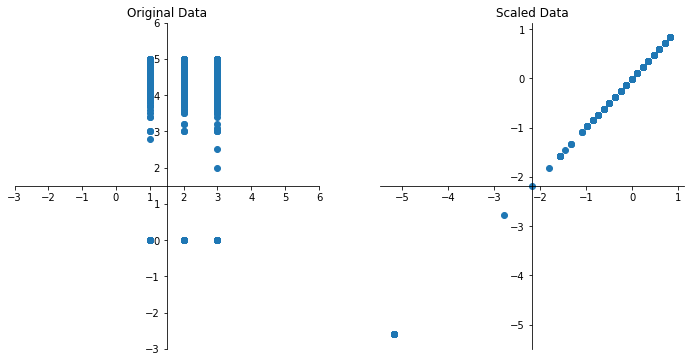

In [37]:
# Create your subplots
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Add title labels
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Using your max x & y values, set the plot axis limits for your 
maxx = -5
maxy = y_train.max()
axes1.set_xlim(-3, 6)
axes1.set_ylim(-3, 6)

# Set limits for your scaled data
# axes2.set_xlim(-3, 3)
# axes2.set_ylim(-3, 3)

# Use a function to apply plot formatting, to avoid having to write it out twice
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# apply formatting function to each axis
set_axes(axes1)
set_axes(axes2)

# plot the original data and the scaled data
axes1.scatter(X_train["StrainType"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Put it all together

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
print(model.score(X_test_scaled, y_test_scaled))

0.9999418561566201


### Split data into training and testing data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [32]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Fit the Model to the scaled training data and make predictions using the scaled test data

In [33]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

### Plot the residuals

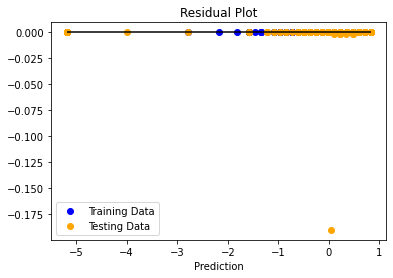

In [34]:
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

## Quantify your model using the scaled data

In [35]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.144067522130093e-05, R2: 0.9999418561566201
